![Traffic lights over urban intersection.](traffic.jpg)

**Challenges in Traffic Sign Management**

Traffic signs convey vital information to drivers. However, their effectiveness can be hindered by various factors, such as their visibility under different lighting conditions or the presence of obstructions.


**Training Traffic Sign Detection Models**

To address these challenges and enhance stop sign and traffic light detection capabilities, advanced technologies such as deep learning and computer vision have gained significant attention. In this project, you'll train an object detection model on 6 images of stop signs and 6 images of traffic lights, taken from various angles and lighting conditions. This training teaches the model to classify and locate these signs in images, improving its robustness and reliability for real-world applications.

(-0.5, 223.5, 223.5, -0.5)

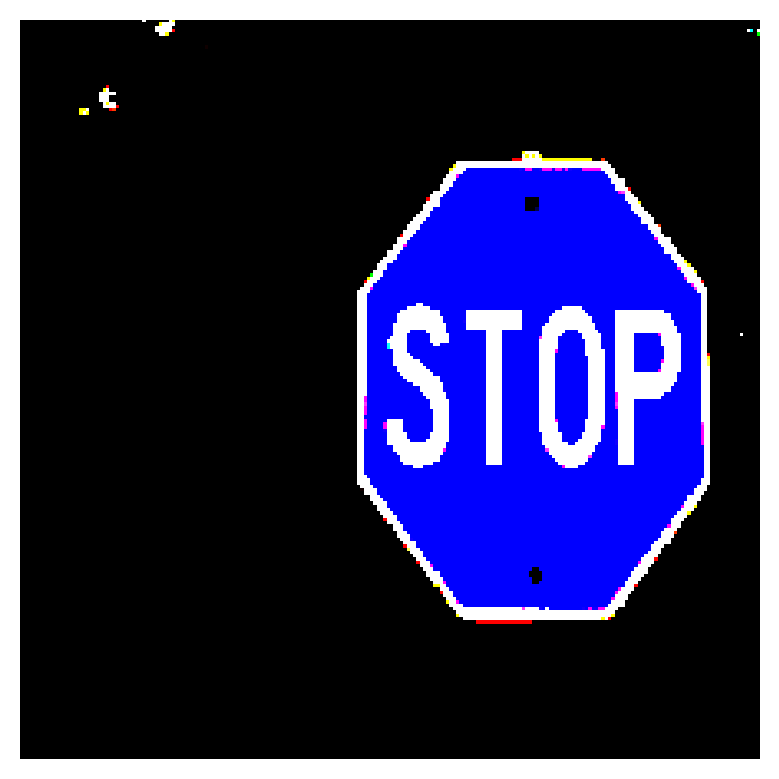

In [57]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load preprocessed images and the corresponding labels
image, labels = np.load('batch.npy',allow_pickle=True).tolist()

# hyperparameters
input_size = image.shape[1] # dimension of input image
num_classes = labels['classifier_head'].shape[1] # number of classes
DROPOUT_FACTOR = 0.2 # dropout probability

# visualize one example preprocessed image
plt.imshow(image[2])
plt.axis("off")

In [58]:
print(labels)

{'classifier_head': array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32), 'regressor_head': array([[0.66558624, 0.51403561, 0.83404826, 0.9802117 ],
       [0.82342864, 0.48787232, 0.85288691, 0.5678864 ],
       [0.45203298, 0.18495539, 0.94057935, 0.82359251],
       [0.47100177, 0.28609199, 0.80305812, 0.50866073],
       [0.4801172 , 0.3422718 , 0.62074029, 0.65952778],
       [0.62407039, 0.57106357, 0.66873815, 0.6475305 ],
       [0.32804997, 0.26722785, 0.46037888, 0.3691856 ],
       [0.36016536, 0.31176621, 0.63347405, 0.71302086],
       [0.28787334, 0.30466413, 0.75658064, 0.6138472 ],
       [0.27572843, 0.36512801, 0.77189627, 0.72675648],
       [0.56672241, 0.17895302, 0.60621964, 0.33216491],
       [0.45080655, 0.29134062, 0.49248446, 0.39813307]])}


In [59]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout

In [60]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Dropout(DROPOUT_FACTOR))
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 52, 52, 64)       

In [61]:
history = model.fit(image, labels['classifier_head'], epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 949ms/step - loss: 5.6663 - accuracy: 0.6667
Epoch 2/20
1/1 [==============================] - 1s 624ms/step - loss: 539.4993 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 1s 566ms/step - loss: 93.8517 - accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - 1s 673ms/step - loss: 227.6224 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 1s 613ms/step - loss: 165.3733 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 1s 593ms/step - loss: 26.5064 - accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 1s 598ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 1s 600ms/step - loss: 24.1984 - accuracy: 0.7500
Epoch 9/20
1/1 [==============================] - 1s 607ms/step - loss: 13.9354 - accuracy: 0.7500
Epoch 10/20
1/1 [==============================] - 1s 596ms/step - loss: 0.0000e+00 - accuracy: 1.0000
E

In [62]:
accuracy_all=history.history['accuracy']
print(accuracy_all)

[0.6666666865348816, 0.5, 0.6666666865348816, 0.5, 0.5, 0.75, 1.0, 0.75, 0.75, 1.0, 1.0, 1.0, 0.8333333134651184, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [63]:
accuracy= model.evaluate(image, labels['classifier_head'], verbose=0)[1]
print(accuracy)

1.0


Functional Approach

In [64]:
from keras.models import Model

In [65]:
input_tensor= Input(shape=(input_size, input_size, 3))
layer= Conv2D(32, kernel_size=3, activation='relu')(input_tensor)
layer= MaxPool2D(2)(layer)
layer= Conv2D(32, kernel_size=3, activation='relu')(layer)
layer= MaxPool2D(2)(layer)
layer= Conv2D(64, kernel_size=3, activation='relu')(layer)
layer= Dropout(DROPOUT_FACTOR)(layer)
layer= Flatten()(layer)
classifier_output= Dense(num_classes, activation='softmax', name='classifier_head')(layer)
regressor_output= Dense(4, activation='linear', name='regressor_head')(layer)

model2= Model(inputs= input_tensor, outputs=[classifier_output, regressor_output])
model2.compile(optimizer='adam', loss={'classifier_head':'categorical_crossentropy',
                                       'regressor_head': 'mean_absolute_error'},
    metrics={'classifier_head': 'accuracy',
            'regressor_head': 'mean_absolute_error'})
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_18 (Conv2D)             (None, 222, 222, 32  896         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 111, 111, 32  0          ['conv2d_18[0][0]']              
 )                              )                                                           

In [66]:
history = model2.fit(image, [labels['classifier_head'], labels['regressor_head']], epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 16.7007 - classifier_head_loss: 7.0017 - regressor_head_loss: 9.6990 - classifier_head_accuracy: 0.6667 - regressor_head_mean_absolute_error: 9.6990
Epoch 2/20
1/1 [==============================] - 1s 620ms/step - loss: 1084.3853 - classifier_head_loss: 405.4555 - regressor_head_loss: 678.9297 - classifier_head_accuracy: 0.5000 - regressor_head_mean_absolute_error: 678.9297
Epoch 3/20
1/1 [==============================] - 1s 680ms/step - loss: 323.1886 - classifier_head_loss: 39.8499 - regressor_head_loss: 283.3387 - classifier_head_accuracy: 0.7500 - regressor_head_mean_absolute_error: 283.3387
Epoch 4/20
1/1 [==============================] - 1s 592ms/step - loss: 170.6393 - classifier_head_loss: 79.5684 - regressor_head_loss: 91.0710 - classifier_head_accuracy: 0.5000 - regressor_head_mean_absolute_error: 91.0710
Epoch 5/20
1/1 [==============================] - 1s 613ms/step - loss: 136.5057 - classifier_head_lo

In [67]:
predictions= model2.predict(image)
y_pred_classification= predictions[0]
pred_classes= np.argmax(y_pred_classification, axis= 1)

y_pred_regression = predictions[1]

1/1 [==============================] - 0s 107ms/step


In [68]:
y_pred_regression

array([[ 4.54018354e-01,  7.99704790e-01,  3.68392944e-01,
         2.73338724e-02],
       [ 6.49982035e-01,  5.02787948e-01,  3.95900726e-01,
         1.06974900e-01],
       [ 1.87400505e-01,  2.35941663e-01,  3.30280602e-01,
         5.31743318e-02],
       [-6.79379841e-03,  1.55072853e-01, -8.34183618e-02,
        -5.14554642e-02],
       [ 2.93780059e-01,  2.59055883e-01,  2.97634721e-01,
         1.46792941e-02],
       [ 7.81164885e-01,  3.10895157e+00, -1.02461934e+00,
        -8.83257166e-02],
       [ 2.00516963e-03,  5.29053986e-01, -2.06250280e-01,
        -1.63449466e-01],
       [ 7.90551081e-02,  5.59394360e-01,  2.01666534e-01,
         2.21685901e-01],
       [ 4.23400290e-02,  5.02743006e-01,  3.48644480e-02,
        -6.63483068e-02],
       [ 1.08317874e-01,  3.49701136e-01,  6.66908100e-02,
        -6.91329986e-02],
       [ 1.23778653e+00,  1.27036619e+00,  4.66941029e-01,
        -1.41962335e-01],
       [ 3.99010330e-01,  5.69344938e-01,  6.42893851e-01,
      

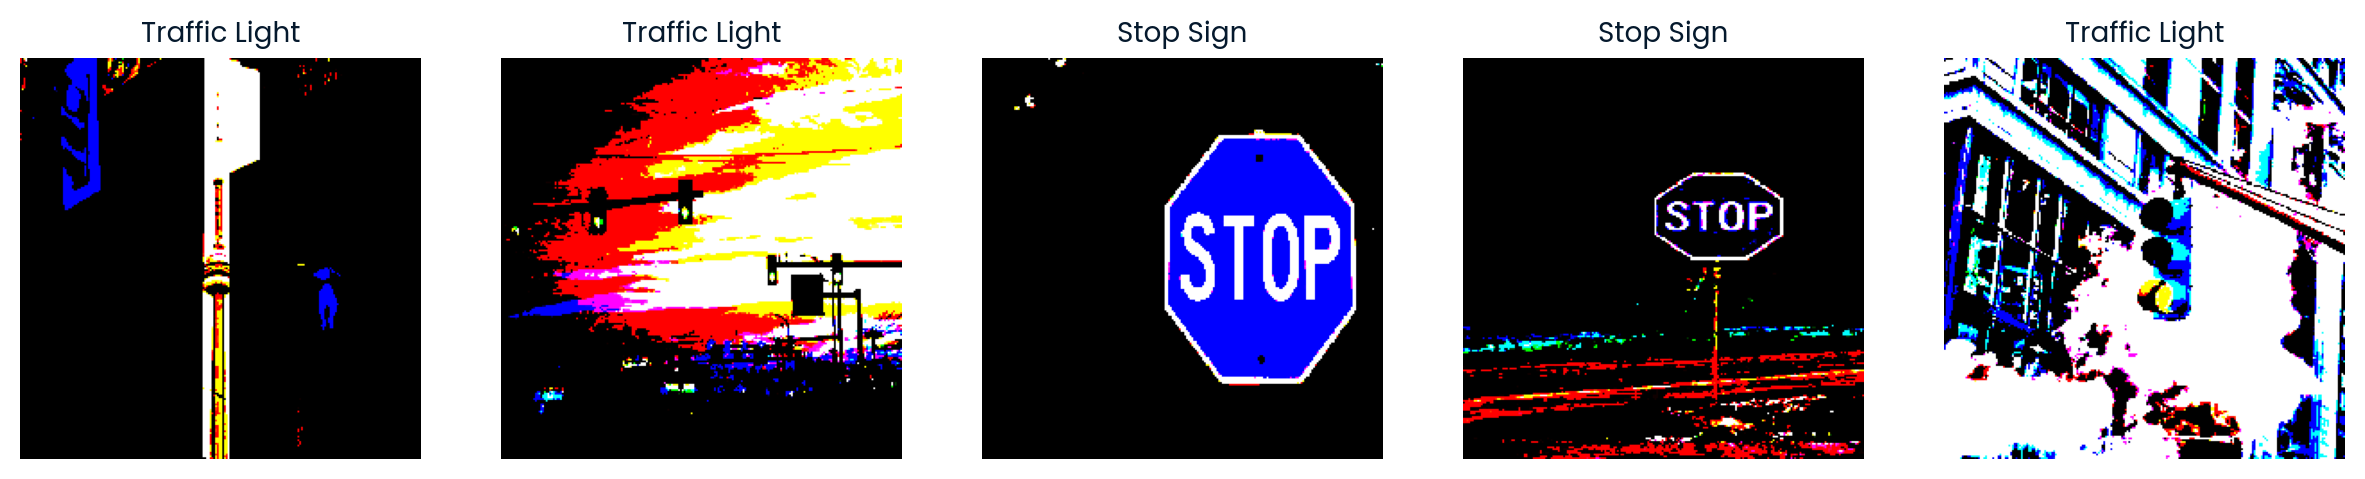

In [69]:
class_names = ['Stop Sign', 'Traffic Light']

fig, axs= plt.subplots(nrows= 1, ncols= 5, figsize= (15, 5))
for i in range(5):
    axs[i].imshow(image[i])
    predicted_class = class_names[pred_classes[i]]
    axs[i].set_title(f'{predicted_class}', fontsize=10)
    
    axs[i].axis('off')

plt.show()